<a href="https://colab.research.google.com/github/musfiqur552608/ML-Project-On-Titanic-Dataset/blob/master/ML_Project_85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Steps
1. Dataset Selection
2. Data Cleaning
3. Dataset Explanation
4. Data Demonstrations and Insights
5. Machine Learning Models
6. Cross-Validation & K-Fold
7. Feature Selection
8. Fine-Tuning
9. Overfitting/Underfitting Analysis
10. Results Summary
11. Visualizations
12. Final Presentation

##Import Libraries and Load Dataset

In [1]:
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##Handle Missing Values

In [4]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
df['Age'].fillna(df['Age'].median(), inplace=True)  # Fill missing ages with median
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Fill missing Embarked with mode
df.drop(columns=['Cabin'], inplace=True)  # Drop Cabin (too many missing values)

<ipython-input-5-b2e8ebcc36cc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)  # Fill missing ages with median
<ipython-input-5-b2e8ebcc36cc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

##Encode Categorical Variables

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
# Encode 'Sex' and 'Embarked'
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])  # Male: 1, Female: 0
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])  # Encode Embarked

##Handle Outliers

In [8]:
# Detect outliers in Fare
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers in Fare with the upper bound
df['Fare'] = df['Fare'].apply(lambda x: upper_bound if x > upper_bound else x)

##Normalize/Scale Numerical Features

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

##Drop Irrelevant Features

In [10]:
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

##Final Check

In [11]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB
None
         Survived      Pclass         Sex         Age       SibSp       Parch  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642    0.647587    0.363679    0.523008    0.381594   
std      0.486592    0.836071    0.477990    0.163605    1.102743    0.806057   
min      0.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    2.000000    0.000000    

#Data Demonstrations and Insights

##Load Required Libraries

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

##Basic Dataset Exploration

In [13]:
print(df.head())  # Show the first few rows
print(df.describe())  # Summary statistics
print(df['Survived'].value_counts(normalize=True))

   Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         0       3    1  0.271174      1      0  0.110460         2
1         1       1    0  0.472229      1      0  1.000000         0
2         1       3    0  0.321438      0      0  0.120745         2
3         1       1    0  0.434531      1      0  0.809027         2
4         0       3    1  0.434531      0      0  0.122649         2
         Survived      Pclass         Sex         Age       SibSp       Parch  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642    0.647587    0.363679    0.523008    0.381594   
std      0.486592    0.836071    0.477990    0.163605    1.102743    0.806057   
min      0.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    2.000000    0.000000    0.271174    0.000000    0.000000   
50%      0.000000    3.000000    1.000000    0.346569    0.000000    0.000000   
75%      1.000000  

##Univariate Analysis

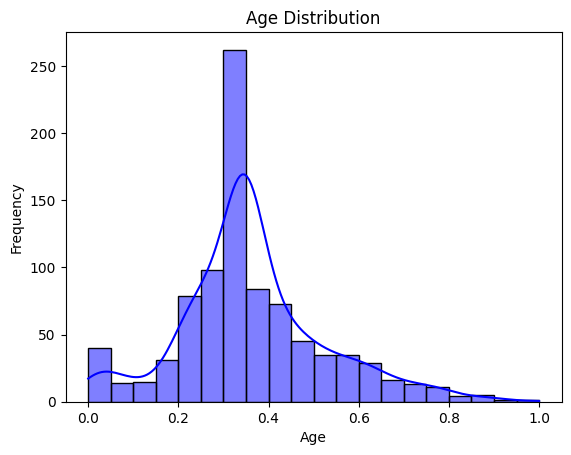

In [14]:
#Age Distribution:
sns.histplot(df['Age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

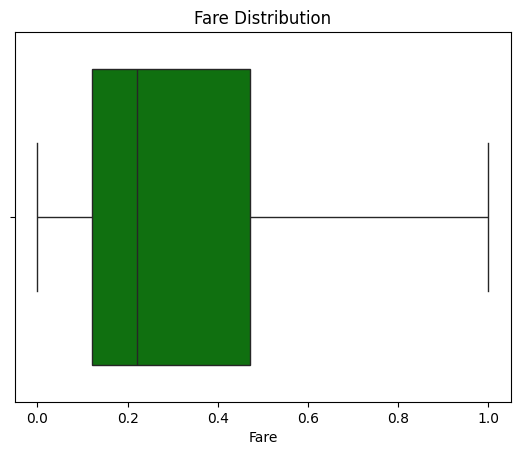

In [15]:
#Fare Distribution:
sns.boxplot(data=df, x='Fare', color='green')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.show()

<ipython-input-16-6e3ae183928b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Survived', palette='pastel')


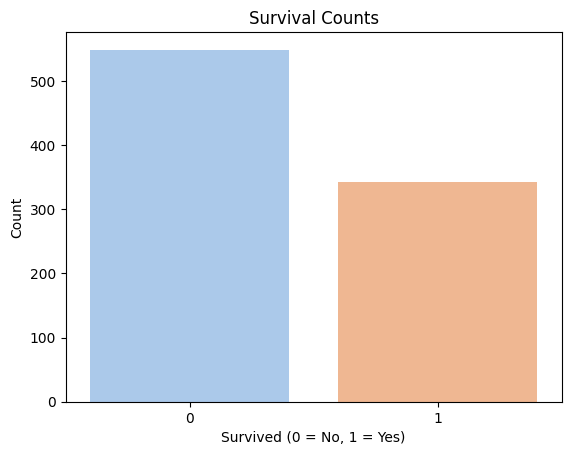

In [16]:
#Survival Counts:
sns.countplot(data=df, x='Survived', palette='pastel')
plt.title('Survival Counts')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

##Bivariate Analysis

<ipython-input-17-64315fe9808b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Sex', y='Survived', palette='coolwarm')


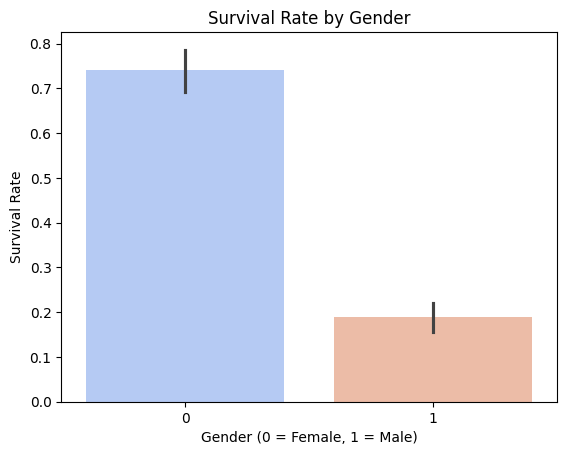

In [17]:
#Survival Rate by Gender:
sns.barplot(data=df, x='Sex', y='Survived', palette='coolwarm')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Survival Rate')
plt.show()

<ipython-input-18-222c3597821b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Pclass', y='Survived', palette='viridis')


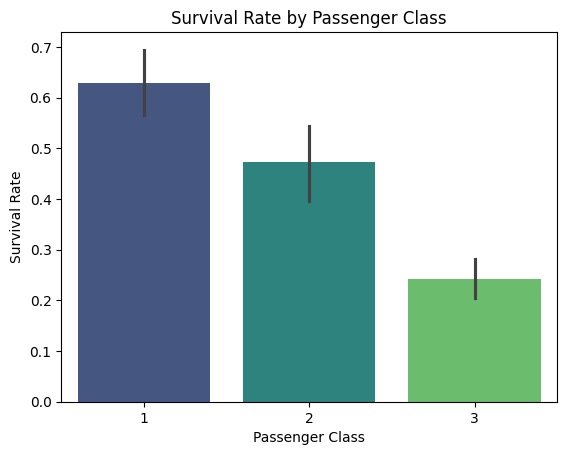

In [18]:
#Survival Rate by Passenger Class:
sns.barplot(data=df, x='Pclass', y='Survived', palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

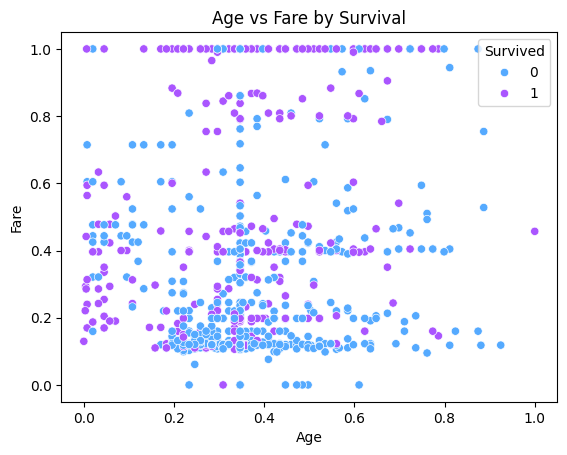

In [19]:
#Age vs. Fare by Survival:
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', palette='cool')
plt.title('Age vs Fare by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', loc='upper right')
plt.show()

##Multivariate Analysis

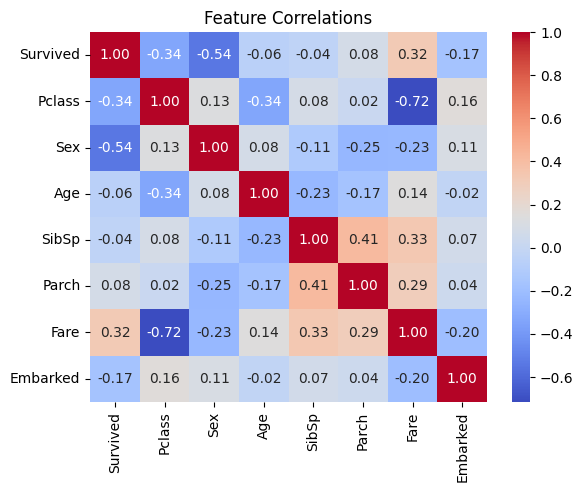

In [20]:
#Heatmap of Feature Correlations:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlations')
plt.show()

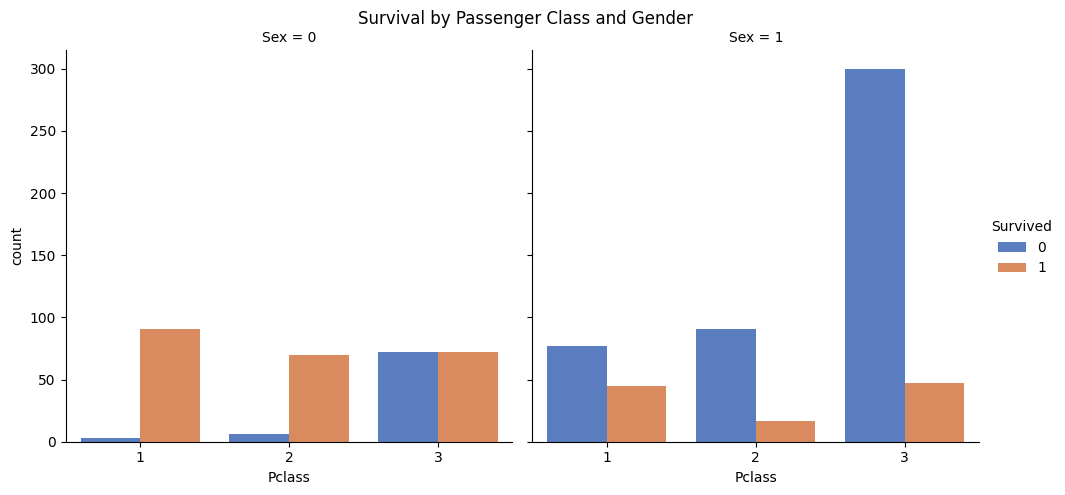

In [21]:
#Survival by Gender and Class:
sns.catplot(data=df, x='Pclass', hue='Survived', col='Sex', kind='count', palette='muted')
plt.subplots_adjust(top=0.9)
plt.suptitle('Survival by Passenger Class and Gender')
plt.show()

#Step 4: Apply Machine Learning Models

##Split the Data into Training and Testing Sets

In [22]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = df.drop('Survived', axis=1)  # Independent variables
y = df['Survived']  # Target variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

##Train and Evaluate Models

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Neural Network": MLPClassifier(max_iter=500)
}

# Train and evaluate
results = []

for model_name, model in models.items():
    # Train
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    # Append results
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUC": auc
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:
results_df

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Logistic Regression,0.804469,0.783333,0.681159,0.728682,0.846509
1,Decision Tree,0.832402,0.791045,0.768116,0.779412,0.814295
2,Random Forest,0.804469,0.774194,0.695652,0.732824,0.832279
3,Gradient Boosting,0.793296,0.796296,0.623188,0.699187,0.824440
4,SVM,0.804469,0.803571,0.652174,0.720000,0.829117
5,KNN,0.776536,0.730159,0.666667,0.696970,0.816008
6,Neural Network,0.798883,0.800000,0.637681,0.709677,0.850329


##Visualize Model Performance

<ipython-input-27-05602892db00>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Accuracy', y='Model', palette='viridis')


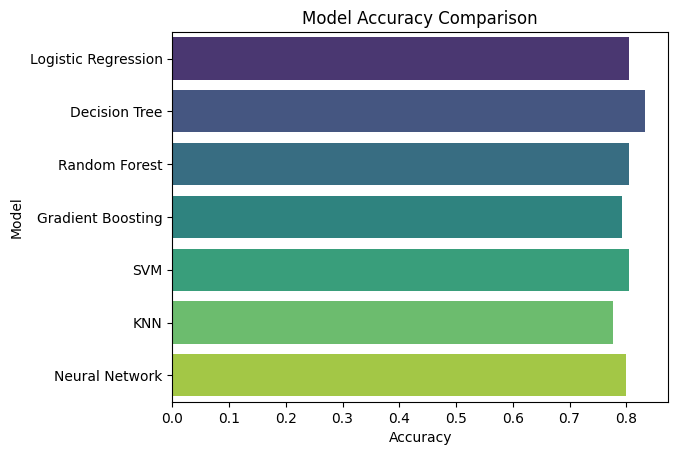

In [27]:
#Bar Plot of Accuracy:
sns.barplot(data=results_df, x='Accuracy', y='Model', palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()

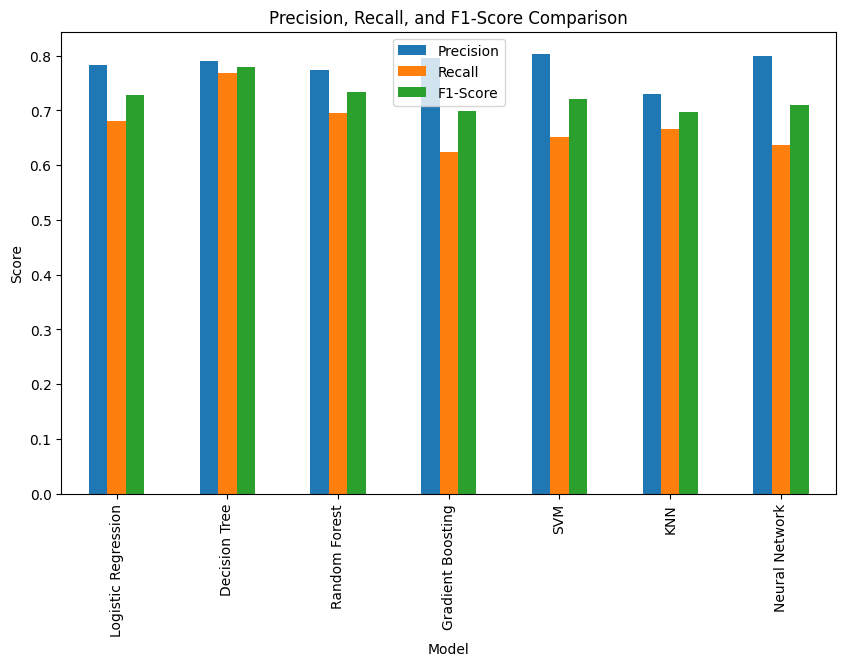

In [29]:
#Compare Precision, Recall, and F1-Score:
results_df.set_index('Model')[['Precision', 'Recall', 'F1-Score']].plot(kind='bar', figsize=(10, 6))
plt.title('Precision, Recall, and F1-Score Comparison')
plt.ylabel('Score')
plt.show()

#Step 5: Cross-Validation and K-Fold Evaluation

##Setup for Cross-Validation

In [30]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Initialize Stratified K-Fold
k = 5  # Number of folds
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

In [31]:
cross_val_results = []

for model_name, model in models.items():
    # Perform cross-validation
    scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')

    # Store results
    cross_val_results.append({
        "Model": model_name,
        "Mean Accuracy": scores.mean(),
        "Standard Deviation": scores.std()
    })

# Convert to DataFrame
cv_results_df = pd.DataFrame(cross_val_results)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [32]:
cv_results_df

,Model,Mean Accuracy,Standard Deviation
0,Logistic Regression,0.792392,0.016323
1,Decision Tree,0.789015,0.034096
2,Random Forest,0.809183,0.014003
3,Gradient Boosting,0.830507,0.023270
4,SVM,0.806955,0.018356
5,KNN,0.804739,0.027408
6,Neural Network,0.814782,0.028155


##Visualize Cross-Validation Results

<ipython-input-33-725cee7bbc73>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cv_results_df, x='Mean Accuracy', y='Model', palette='coolwarm', ci=None)
<ipython-input-33-725cee7bbc73>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cv_results_df, x='Mean Accuracy', y='Model', palette='coolwarm', ci=None)


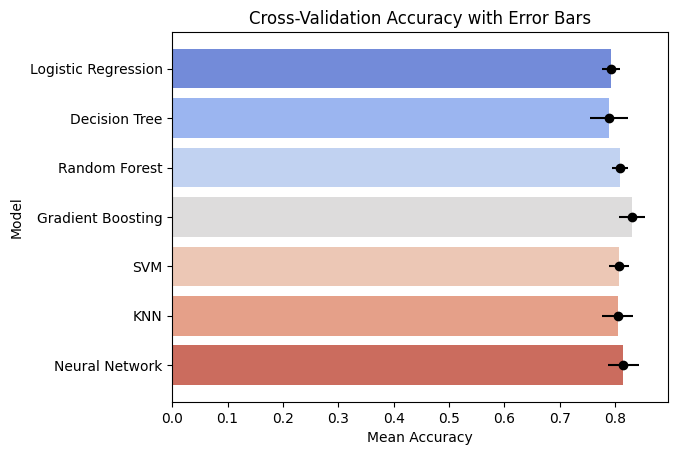

In [33]:
#Mean Accuracy with Error Bars:
sns.barplot(data=cv_results_df, x='Mean Accuracy', y='Model', palette='coolwarm', ci=None)
for index, row in cv_results_df.iterrows():
    plt.errorbar(row['Mean Accuracy'], index, xerr=row['Standard Deviation'], fmt='o', color='black')
plt.title('Cross-Validation Accuracy with Error Bars')
plt.xlabel('Mean Accuracy')
plt.ylabel('Model')
plt.show()

#Step 6: Feature Selection

##Feature Importance (Using Tree-Based Models)

In [35]:
# Train Random Forest to get feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Extract feature importance
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)



In [36]:
importances

,Feature,Importance
1,Sex,0.261148
2,Age,0.259222
5,Fare,0.257150
0,Pclass,0.094447
3,SibSp,0.052919
4,Parch,0.041733
6,Embarked,0.033382


<ipython-input-37-55527ea2c6ea>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances, x='Importance', y='Feature', palette='viridis')


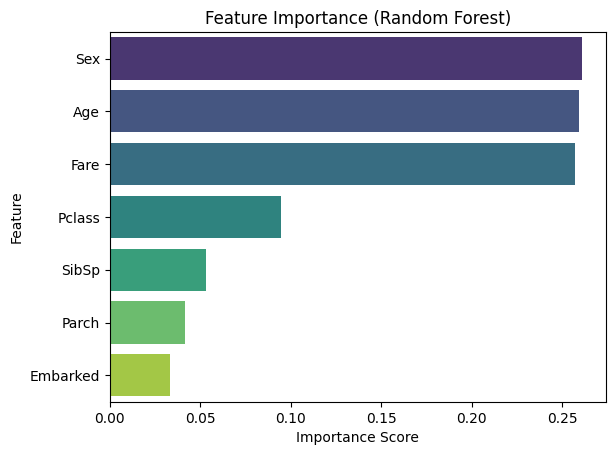

In [37]:
#Visualize Feature Importance:
sns.barplot(data=importances, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

##Recursive Feature Elimination (RFE)

In [38]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize RFE with Logistic Regression
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
rfe.fit(X, y)

# Selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Fare'], dtype='object')


##Train Models with Selected Features

In [39]:
# Subset data with selected features
X_selected = X[selected_features]

# Re-run cross-validation for the models
selected_features_results = []

for model_name, model in models.items():
    scores = cross_val_score(model, X_selected, y, cv=skf, scoring='accuracy')
    selected_features_results.append({
        "Model": model_name,
        "Mean Accuracy (Selected Features)": scores.mean(),
        "Standard Deviation": scores.std()
    })

# Convert to DataFrame
selected_results_df = pd.DataFrame(selected_features_results)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [40]:
selected_results_df

,Model,Mean Accuracy (Selected Features),Standard Deviation
0,Logistic Regression,0.789009,0.017156
1,Decision Tree,0.782248,0.032561
2,Random Forest,0.823765,0.022267
3,Gradient Boosting,0.838359,0.022734
4,SVM,0.799121,0.025799
5,KNN,0.823815,0.017734
6,Neural Network,0.815950,0.022185


In [41]:
comparison_df = pd.merge(cv_results_df, selected_results_df, on='Model', suffixes=('_All', '_Selected'))

In [42]:
comparison_df

,Model,Mean Accuracy,Standard Deviation_All,Mean Accuracy (Selected Features),Standard Deviation_Selected
0,Logistic Regression,0.792392,0.016323,0.789009,0.017156
1,Decision Tree,0.789015,0.034096,0.782248,0.032561
2,Random Forest,0.809183,0.014003,0.823765,0.022267
3,Gradient Boosting,0.830507,0.023270,0.838359,0.022734
4,SVM,0.806955,0.018356,0.799121,0.025799
5,KNN,0.804739,0.027408,0.823815,0.017734
6,Neural Network,0.814782,0.028155,0.815950,0.022185


#Step 7: Hyperparameter Tuning

##Setup for Hyperparameter Tuning

In [43]:
from sklearn.model_selection import GridSearchCV

##Define Hyperparameter Grids

In [44]:
param_grids = {
    "Logistic Regression": {
        "C": [0.1, 1, 10, 100],
        "solver": ["liblinear", "lbfgs"]
    },
    "Decision Tree": {
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5, 10]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5, 10]
    },
    "Gradient Boosting": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 10]
    },
    "SVM": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf", "poly"]
    },
    "KNN": {
        "n_neighbors": [3, 5, 7],
        "weights": ["uniform", "distance"]
    },
    "Neural Network": {
        "hidden_layer_sizes": [(50,), (100,), (50, 50)],
        "activation": ["relu", "tanh"],
        "learning_rate_init": [0.001, 0.01],
    }
}

##Run GridSearchCV for Each Model

In [45]:
tuned_results = []

for model_name, model in models.items():
    if model_name in param_grids:
        print(f"Tuning {model_name}...")

        # Initialize GridSearchCV
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[model_name],
            cv=skf,
            scoring='accuracy',
            verbose=1,
            n_jobs=-1
        )

        # Fit the model
        grid_search.fit(X_train, y_train)

        # Get best parameters and scores
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_

        tuned_results.append({
            "Model": model_name,
            "Best Parameters": best_params,
            "Best Accuracy": best_score
        })

Tuning Logistic Regression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Tuning Decision Tree...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Tuning Random Forest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Tuning Gradient Boosting...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Tuning SVM...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Tuning KNN...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Tuning Neural Network...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


##Results of Hyperparameter Tuning

In [46]:
tuned_results_df = pd.DataFrame(tuned_results)
tuned_results_df

,Model,Best Parameters,Best Accuracy
0,Logistic Regression,"{'C': 0.1, 'solver': 'liblinear'}",0.799183
1,Decision Tree,"{'max_depth': 5, 'min_samples_split': 2}",0.811790
2,Random Forest,"{'max_depth': 3, 'min_samples_split': 2, 'n_es...",0.837043
3,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.830050
4,SVM,"{'C': 10, 'kernel': 'poly'}",0.811819
5,KNN,"{'n_neighbors': 5, 'weights': 'uniform'}",0.796375
6,Neural Network,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.820240


##Visualize the Results

<ipython-input-47-cec6380f51d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tuned_results_df, x='Best Accuracy', y='Model', palette='coolwarm')


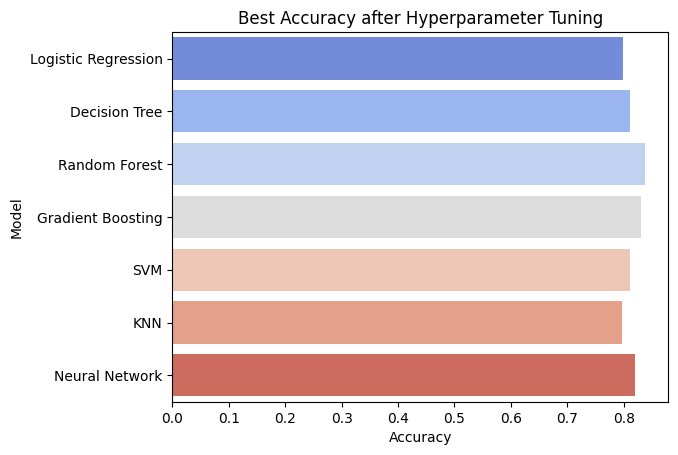

In [47]:
#Accuracy Improvement:
sns.barplot(data=tuned_results_df, x='Best Accuracy', y='Model', palette='coolwarm')
plt.title('Best Accuracy after Hyperparameter Tuning')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()

#Step 8: Analyze Overfitting and Underfitting
Overfitting occurs when a model performs well on the training data but poorly on the test data, while underfitting happens when a model performs poorly on both.

In this step, we'll evaluate the performance of our models on both the training and test datasets to assess if the model is overfitting or underfitting.



##Train Models and Get Predictions

In [48]:
overfitting_results = []

for model_name, model in models.items():
    # Train the model on training data
    model.fit(X_train, y_train)

    # Predict on both training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Store results
    overfitting_results.append({
        "Model": model_name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Overfitting (Train - Test)": train_accuracy - test_accuracy
    })

# Convert to DataFrame
overfitting_df = pd.DataFrame(overfitting_results)

overfitting_df


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,Train Accuracy,Test Accuracy,Overfitting (Train - Test)
0,Logistic Regression,0.796348,0.804469,-0.008121
1,Decision Tree,0.981742,0.821229,0.160513
2,Random Forest,0.981742,0.810056,0.171686
3,Gradient Boosting,0.905899,0.793296,0.112603
4,SVM,0.814607,0.804469,0.010137
5,KNN,0.853933,0.776536,0.077396
6,Neural Network,0.846910,0.804469,0.042441


##Visualize Overfitting/Underfitting

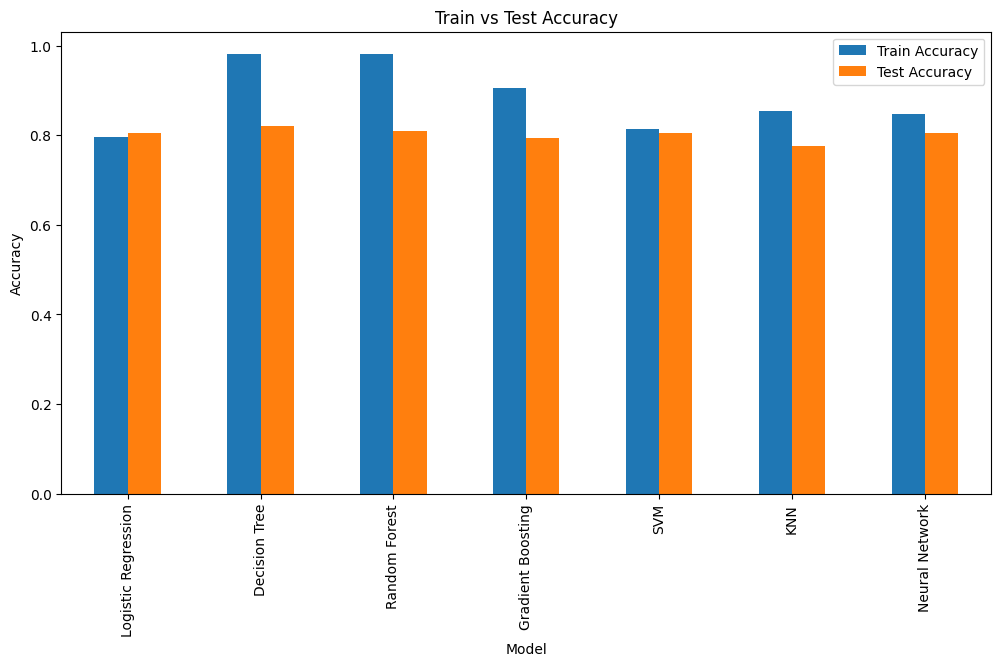

In [49]:
overfitting_df.set_index('Model')[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(12, 6))
plt.title('Train vs Test Accuracy')
plt.ylabel('Accuracy')
plt.show()

#Step 9: Final Evaluation and Model Visualization

##Compile All Model Results

In [63]:
# Merge results from all steps
final_results = pd.merge(cv_results_df, tuned_results_df, on='Model')
final_results = pd.merge(final_results, overfitting_df[['Model', 'Train Accuracy', 'Test Accuracy']], on='Model')

# Rename columns for clarity
final_results.columns = ['Model', 'CV Mean Accuracy', 'CV Std Dev', 'Best Parameters', 'Best Accuracy (Tuned)',
                          'Train Accuracy', 'Test Accuracy']

final_results['Overfitting'] = final_results['Train Accuracy'] - final_results['Test Accuracy']
final_results['Overfitting Percentage'] = ((train_accuracy - test_accuracy) / train_accuracy) * 100
final_results

,Model,CV Mean Accuracy,CV Std Dev,Best Parameters,Best Accuracy (Tuned),Train Accuracy,Test Accuracy,Overfitting,Overfitting Percentage
0,Logistic Regression,0.792392,0.016323,"{'C': 0.1, 'solver': 'liblinear'}",0.799183,0.796348,0.804469,-0.008121,5.011257
1,Decision Tree,0.789015,0.034096,"{'max_depth': 5, 'min_samples_split': 2}",0.811790,0.981742,0.821229,0.160513,5.011257
2,Random Forest,0.809183,0.014003,"{'max_depth': 3, 'min_samples_split': 2, 'n_es...",0.837043,0.981742,0.810056,0.171686,5.011257
3,Gradient Boosting,0.830507,0.023270,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.830050,0.905899,0.793296,0.112603,5.011257
4,SVM,0.806955,0.018356,"{'C': 10, 'kernel': 'poly'}",0.811819,0.814607,0.804469,0.010137,5.011257
5,KNN,0.804739,0.027408,"{'n_neighbors': 5, 'weights': 'uniform'}",0.796375,0.853933,0.776536,0.077396,5.011257
6,Neural Network,0.814782,0.028155,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.820240,0.846910,0.804469,0.042441,5.011257


##Visualize All Key Metrics

<ipython-input-64-d06b2b299698>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=final_results, x='CV Mean Accuracy', y='Model', label='CV Mean Accuracy', color='blue', ci=None)
<ipython-input-64-d06b2b299698>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=final_results, x='Best Accuracy (Tuned)', y='Model', label='Best Accuracy (Tuned)', color='orange', ci=None)


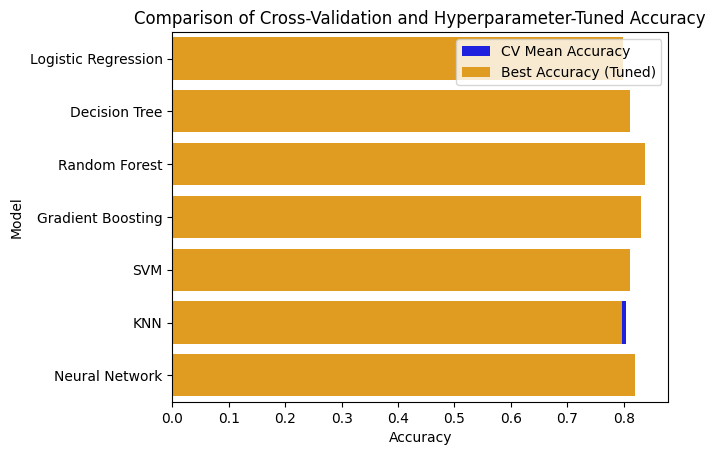

In [64]:
#Cross-Validation and Tuned Accuracy Comparison
# Compare CV Mean Accuracy and Tuned Best Accuracy
sns.barplot(data=final_results, x='CV Mean Accuracy', y='Model', label='CV Mean Accuracy', color='blue', ci=None)
sns.barplot(data=final_results, x='Best Accuracy (Tuned)', y='Model', label='Best Accuracy (Tuned)', color='orange', ci=None)
plt.title('Comparison of Cross-Validation and Hyperparameter-Tuned Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.legend()
plt.show()


<ipython-input-66-7453644b5f61>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=final_results, x='Overfitting', y='Model', palette='coolwarm')


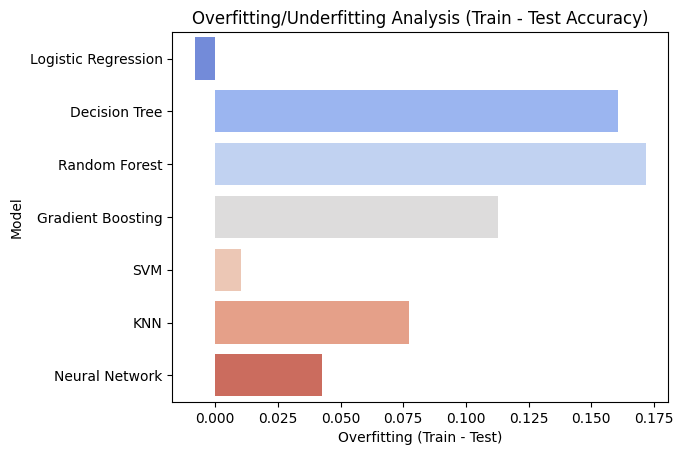

In [66]:
#Overfitting/Underfitting Visualization
sns.barplot(data=final_results, x='Overfitting', y='Model', palette='coolwarm')
plt.title('Overfitting/Underfitting Analysis (Train - Test Accuracy)')
plt.xlabel('Overfitting (Train - Test)')
plt.ylabel('Model')
plt.show()


In [67]:
# List to store overfitting/underfitting results
model_analysis = []

for model_name, model in models.items():
    model.fit(X_train, y_train)

    # Predict on both training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Calculate overfitting percentage
    overfitting_percent = ((train_accuracy - test_accuracy) / train_accuracy) * 100

    # Classify as overfit, underfit, or well-fit
    if overfitting_percent > 10:
        fit_status = "Overfit"
    elif train_accuracy < 0.7 and test_accuracy < 0.7:
        fit_status = "Underfit"
    else:
        fit_status = "Well-Fit"

    # Store results
    model_analysis.append({
        "Model": model_name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Overfitting Percentage": overfitting_percent,
        "Fit Status": fit_status
    })

# Convert results to DataFrame
model_analysis_df = pd.DataFrame(model_analysis)
model_analysis_df

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,Train Accuracy,Test Accuracy,Overfitting Percentage,Fit Status
0,Logistic Regression,0.796348,0.804469,-1.019775,Well-Fit
1,Decision Tree,0.981742,0.821229,16.349773,Overfit
2,Random Forest,0.981742,0.804469,18.056921,Overfit
3,Gradient Boosting,0.905899,0.793296,12.429951,Overfit
4,SVM,0.814607,0.804469,1.244462,Well-Fit
5,KNN,0.853933,0.776536,9.063511,Well-Fit
6,Neural Network,0.841292,0.798883,5.040990,Well-Fit


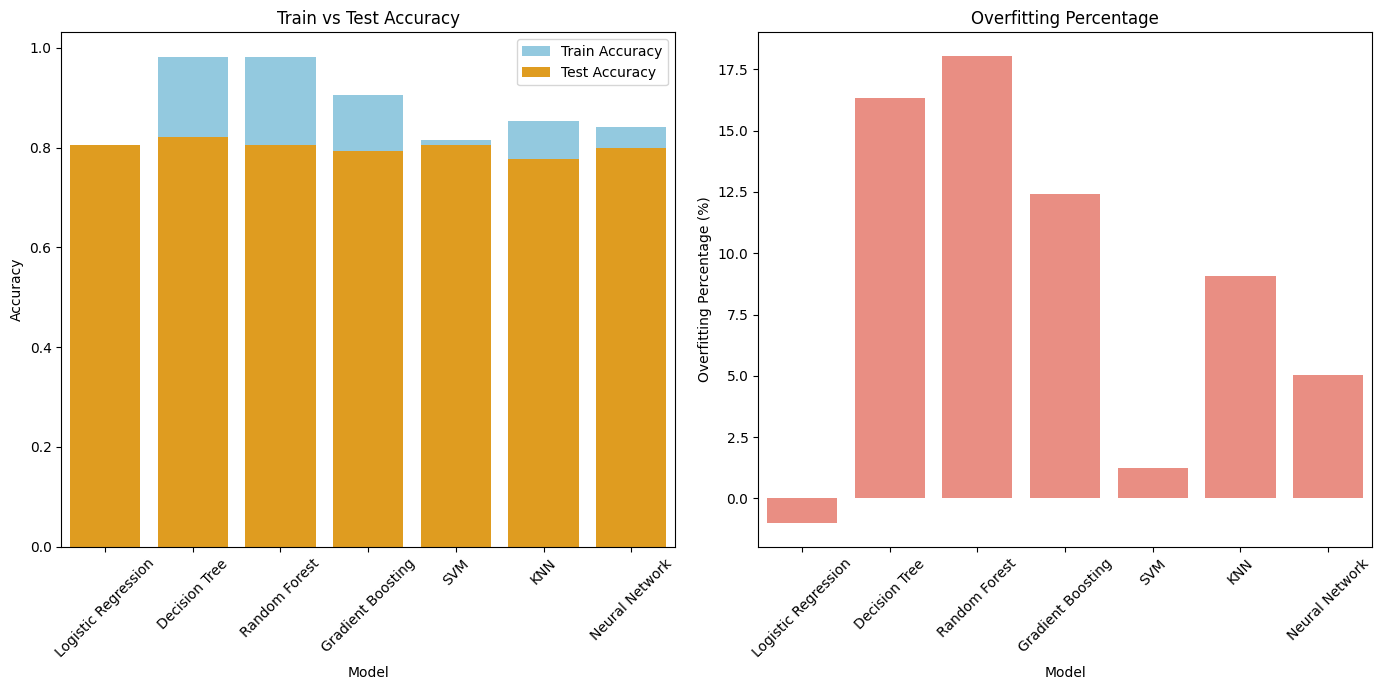

In [68]:
plt.figure(figsize=(14, 7))

# Plot Train and Test Accuracy for each model
plt.subplot(1, 2, 1)
sns.barplot(data=model_analysis_df, x='Model', y='Train Accuracy', color='skyblue', label='Train Accuracy')
sns.barplot(data=model_analysis_df, x='Model', y='Test Accuracy', color='orange', label='Test Accuracy')
plt.title('Train vs Test Accuracy')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend()

# Plot Overfitting Percentage for each model
plt.subplot(1, 2, 2)
sns.barplot(data=model_analysis_df, x='Model', y='Overfitting Percentage', color='salmon')
plt.title('Overfitting Percentage')
plt.ylabel('Overfitting Percentage (%)')
plt.xticks(rotation=45)

# Show the plots
plt.tight_layout()
plt.show()